<a href="https://colab.research.google.com/github/prakharsrivastava/powerbi/blob/main/Data_Science_on_Google_Cloud_Platform_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/chapter2/


Mounted at /content/gdrive
/content/gdrive/MyDrive/chapter2


In [ ]:
#flight data
https://raw.githubusercontent.com/GoogleCloudPlatform/data-science-on-gcp/main/04_streaming/transform/flights_sample.json

In [2]:
!pip install findspark 
!pip install  pyspark




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 23.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=9f456960bbbc36f27246300ce726116029cabcbced6553bae6f012447818f494
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [53]:
import findspark
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("architectinaction.com").getOrCreate()

In [4]:
%pip install pytz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.cloud import bigquery

In [11]:
%load_ext sql

In [20]:
%%sql
sqlite:///mydb_1

'Connected: @mydb_1'

In [22]:
import pandas as pd
airports = pd.read_csv('airports.csv',low_memory=False,nrows=3)
flight = pd.read_json('flights_sample.json',lines=True)

In [23]:
sparkAirportsDF=spark.createDataFrame(airports)
sparkFlightDF=spark.createDataFrame(flight)

In [24]:

import sqlite3
conn = sqlite3.connect('mydb_1')
c = conn.cursor()
flight.to_sql('flights_view_', conn, if_exists='replace', index = False)

In [25]:
import pandas as pd
df = pd.read_json('flights_sample.json',lines=True)

import sqlite3
conn = sqlite3.connect('mydb_1')
c = conn.cursor()
df.to_sql('flights_view_', conn, if_exists='replace', index = False)

In [26]:
%%sql
SELECT
 *
FROM flights_view_

   sqlite:///mydb_
 * sqlite:///mydb_1
Done.


FL_DATE,UNIQUE_CARRIER,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_SEQ_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE
2015-04-28,EV,1000101,ABE,1000101,ATL,1600,1970-01-01 00:25:55,-5.0,7.0,1602,1747,4.0,1809,1970-01-01 00:29:11,-18.0,0,0,692
2015-11-05,DL,1000101,ABE,1000101,ATL,600,1970-01-01 00:09:16,-4.0,12.0,0608,0749,10.0,818,1970-01-01 00:12:39,-19.0,0,0,692
2015-08-25,EV,1013503,ABE,1143302,DTW,1726,1970-01-01 00:28:59,13.0,11.0,1750,1906,3.0,1905,1970-01-01 00:31:49,4.0,0,0,425
2015-12-17,EV,1013503,ABE,1393004,ORD,651,1970-01-01 00:10:42,-9.0,9.0,0651,0743,9.0,811,1970-01-01 00:12:32,-19.0,0,0,655
2015-03-04,MQ,1013603,ABI,1129803,DFW,1549,None,None,None,,,None,1640,None,None,1,0,158
2015-08-08,MQ,1013603,ABI,1129804,DFW,1508,1970-01-01 00:24:17,-11.0,8.0,1505,1538,7.0,1603,1970-01-01 00:25:45,-18.0,0,0,158
2015-07-23,MQ,1013603,ABI,1129804,DFW,1823,1970-01-01 00:30:51,28.0,6.0,1857,1931,45.0,1924,1970-01-01 00:33:36,52.0,0,0,158
2015-02-01,DL,1014003,ABQ,1039705,ATL,1318,1970-01-01 00:21:52,-6.0,13.0,1325,1748,14.0,1814,1970-01-01 00:30:02,-12.0,0,0,1269
2015-04-25,WN,1014003,ABQ,1082103,BWI,1125,1970-01-01 00:18:41,-4.0,14.0,1135,1644,6.0,1710,1970-01-01 00:27:30,-20.0,0,0,1670
2015-03-27,WN,1014003,ABQ,1125903,DAL,1920,1970-01-01 00:31:59,-1.0,7.0,1926,2146,4.0,2155,1970-01-01 00:35:50,-5.0,0,0,580


In [ ]:
%%sql
SELECT
  -18/COUNT(arr_delay) AS frac_delayed
FROM flights_view_

 * sqlite:///mydb_
Done.


frac_delayed
0


In [ ]:
sparkFlightDF=sparkFlightDF.select("ARR_DELAY","DEP_DELAY")



In [ ]:
from pyspark.sql.functions import *
sparkFlightDF=sparkFlightDF.withColumn("ontime",when(col("ARR_DELAY")<0,"True").when(col("DEP_DELAY")>0,"True").otherwise("false") )
sparkFlightDF.show()

+---------+---------+------+
|ARR_DELAY|DEP_DELAY|ontime|
+---------+---------+------+
|    -18.0|     -5.0|  True|
|    -19.0|     -4.0|  True|
|      4.0|     13.0|  True|
|    -19.0|     -9.0|  True|
|      NaN|      NaN|  True|
|    -18.0|    -11.0|  True|
|     52.0|     28.0|  True|
|    -12.0|     -6.0|  True|
|    -20.0|     -4.0|  True|
|     -5.0|     -1.0|  True|
|     -7.0|     -4.0|  True|
|     -1.0|     -1.0|  True|
|    -18.0|     -7.0|  True|
|      9.0|     13.0|  True|
|      0.0|      6.0|  True|
|    -13.0|    -12.0|  True|
|     36.0|     46.0|  True|
|     -8.0|      0.0|  True|
|    -10.0|      2.0|  True|
|     -7.0|     -3.0|  True|
+---------+---------+------+
only showing top 20 rows



In [ ]:
sparkFlightDF=sparkFlightDF.toPandas()

In [ ]:
sparkFlightDF

DataFrame[ARR_DELAY: double, DEP_DELAY: double, ontime: string]

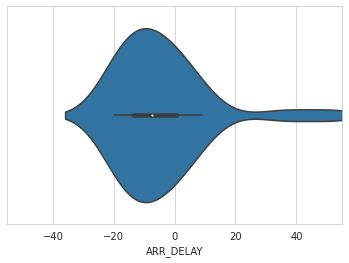

In [ ]:
sns.set_style("whitegrid")
# sns.set(font_scale = 1.5)
ax = sns.violinplot(data=sparkFlightDF, x='ARR_DELAY', inner='box', orient='h')
ax.axes.set_xlim(-55, 55);

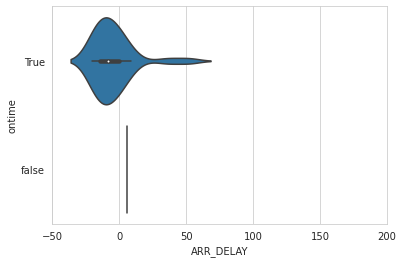

In [ ]:
sns.set_style("whitegrid")
ax = sns.violinplot(data=sparkFlightDF, x='ARR_DELAY', y='ontime', inner='box', orient='h')
ax.set_xlim(-50, 200);

In [ ]:
#https://github.com/GoogleCloudPlatform/data-science-on-gcp/blob/main/05_bqnotebook/exploration.ipynb

In [ ]:
sparkFlightDF.describe()

,ARR_DELAY,DEP_DELAY
count,30.000000,30.000000
mean,-4.200000,1.133333
std,15.772958,12.389465
min,-20.000000,-12.000000
25%,-13.750000,-6.000000
50%,-7.500000,-2.500000
75%,0.750000,1.750000
max,52.000000,46.000000


In [ ]:
import pandas as pd
df = pd.read_sql("""
            SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    AVG(ARR_DELAY*ARR_DELAY) - AVG(ARR_DELAY)*AVG(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
   having DEP_DELAY>0 
ORDER BY DEP_DELAY
            
            """, con = sqlite3.connect('mydb_'))
# return your first five rows


In [16]:
%%sql
SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    AVG(ARR_DELAY*ARR_DELAY) - AVG(ARR_DELAY)*AVG(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
   having DEP_DELAY>0 
ORDER BY DEP_DELAY

 * sqlite:///mydb_


DatabaseError: ignored

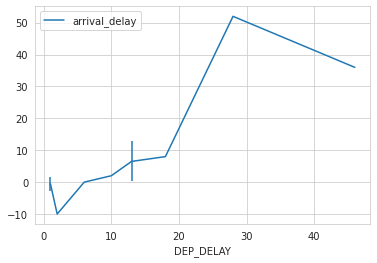

In [ ]:
ax = df.plot(kind='line', x='DEP_DELAY', 
              y='arrival_delay', yerr='stddev_arrival_delay')

In [ ]:
%%sql
    SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY, 101) arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
ORDER BY DEP_DELAY

 * sqlite:///mydb_
(sqlite3.OperationalError) no such function: APPROX_QUANTILES
[SQL: SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY, 101) arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
ORDER BY DEP_DELAY]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [ ]:
import pandas as pd
df = pd.read_sql("""
    SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY, 101) AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
ORDER BY DEP_DELAY
            
            """, con = sqlite3.connect('mydb_'))
# return your first five rows


In [ ]:
z=x-mean/s.d
x=
z*s.d+mean
z score for 30% probablity is 0.52

In [ ]:
df['arr_delay_30'] = (0.52 * df['stddev_arrival_delay']) \
             + df['arrival_delay']
x=df['arr_delay_30']
x

0     0.67
1   -10.00
2     0.00
3     2.00
4     9.75
5     8.00
6    52.00
7    36.00
Name: arr_delay_30, dtype: float64

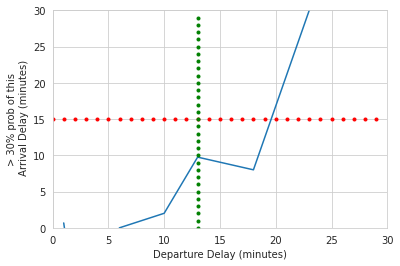

In [ ]:
ax = plt.axes()
df.plot(kind='line', x='DEP_DELAY', y='arr_delay_30',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% prob of this\n Arrival Delay (minutes)');

x = np.arange(-30, 30)
y = np.ones_like(x) * 15
ax.plot(x, y, 'r.');

y = np.arange(-30, 30)
x = np.ones_like(y) * 13
ax.plot(x, y, 'g.');

In [ ]:
#if your departure delay is 19 min more tha your 30% likelihood of arrival >15
#you will cancel meeting if likelyhood 30 % or more
#here data is  normally distributed

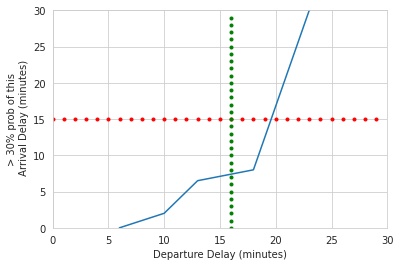

In [ ]:
ax = plt.axes()
df.plot(kind='line', x='DEP_DELAY', y='arrival_delay',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% prob of this\n Arrival Delay (minutes)');

x = np.arange(0, 30)
y = np.ones_like(x) * 15
ax.plot(x, y, 'r.');

y = np.arange(0, 30)
x = np.ones_like(y) * 16
ax.plot(x, y, 'g.');

In [ ]:
%pip freeze

In [ ]:
%pip install google-cloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#test model


ERROR:
 ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7faa68640d30>)


In [ ]:
#confusion matrix
%%sql
SELECT
  SUM(case when DEP_DELAY < -10  AND arr_delay < 0  then 1 else 0 end ) AS correct_nocancel,
  SUM(case when DEP_DELAY < -10  AND arr_delay >= 0  then 1 else 0 end ) AS wrong_nocancel,
  SUM(case when DEP_DELAY >= -10  AND arr_delay <0  then 1 else 0 end ) AS wrong_cancel,
  SUM(case when DEP_DELAY >= -10  AND arr_delay >= 0  then 1 else 0 end ) AS correct_cancel

FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    flights_view_

 
)

 * sqlite:///mydb_
Done.


correct_nocancel,wrong_nocancel,wrong_cancel,correct_cancel
3,0,18,9


In [ ]:
import pandas as pd
df_eval = pd.read_sql("""
         SELECT
  SUM(case when DEP_DELAY < -10  AND arr_delay < 0  then 1 else 0 end ) AS correct_nocancel,
  SUM(case when DEP_DELAY < -10  AND arr_delay >= 0  then 1 else 0 end ) AS wrong_nocancel,
  SUM(case when DEP_DELAY >= -10  AND arr_delay <0  then 1 else 0 end ) AS wrong_cancel,
  SUM(case when DEP_DELAY >= -10  AND arr_delay >= 0  then 1 else 0 end ) AS correct_cancel

FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    flights_view_

 
)
            
            """, con = sqlite3.connect('mydb_'))
# return your first five rows


In [ ]:
#accuracy
print(df_eval['correct_nocancel'] /
      (df_eval['correct_nocancel'] + df_eval['wrong_nocancel']))
print(df_eval['correct_cancel'] / 
      (df_eval['correct_cancel'] + df_eval['wrong_cancel']))

0    1.0
dtype: float64
0    0.333333
dtype: float64


In [ ]:
import pandas as pd
df_eval = pd.read_sql("""
SELECT DISTANCE, DEP_DELAY
FROM flights_view_
WHERE RANDOM() < 0.001 AND dep_delay > -20 AND dep_delay < 30 AND distance < 2000

            
            """, con = sqlite3.connect('mydb_'))
# return your first five rows


In [ ]:
%%sql
SELECT DISTANCE, DEP_DELAY
FROM flights_view_
WHERE RANDOM() < 0.001 AND dep_delay > -20 AND dep_delay < 30 AND distance < 2000


 * sqlite:///mydb_
Done.


DISTANCE,DEP_DELAY
692,-4.0
158,-11.0
158,28.0
1269,-6.0
1670,-4.0
580,-1.0
580,-7.0
349,13.0
349,6.0
349,-12.0


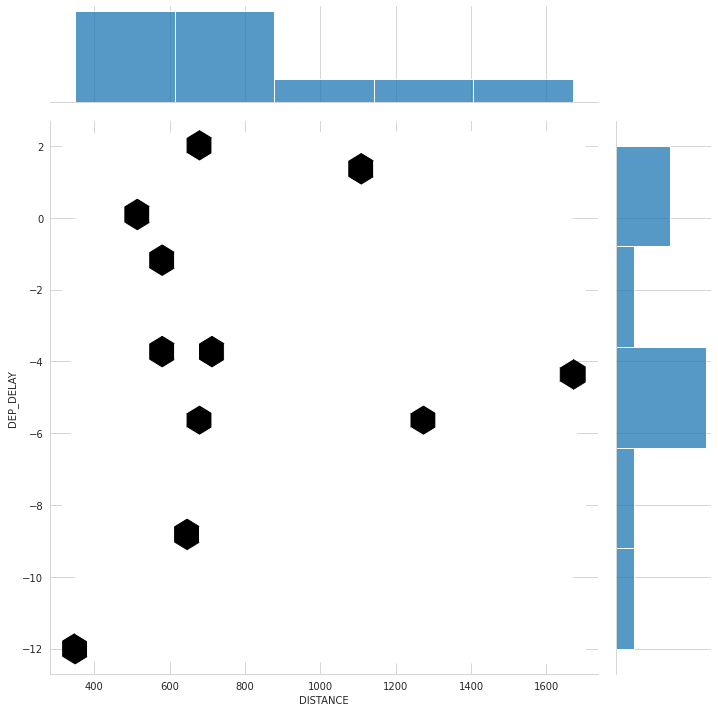

In [ ]:
sns.set_style("whitegrid")
g = sns.jointplot(x=df_eval['DISTANCE'], y=df_eval['DEP_DELAY'], kind="hex", height=10, joint_kws={'gridsize':20})

In [28]:
%%sql
SELECT
  DEP_DELAY, TAXI_OUT, ARR_DELAY, DISTANCE
FROM flights_view_ f




   sqlite:///mydb_
 * sqlite:///mydb_1
Done.


DEP_DELAY,TAXI_OUT,ARR_DELAY,DISTANCE
-5.0,7.0,-18.0,692
-4.0,12.0,-19.0,692
13.0,11.0,4.0,425
-9.0,9.0,-19.0,655
None,None,None,158
-11.0,8.0,-18.0,158
28.0,6.0,52.0,158
-6.0,13.0,-12.0,1269
-4.0,14.0,-20.0,1670
-1.0,7.0,-5.0,580


In [102]:
from pyspark.sql.functions import *
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.regression import *
from numpy import nan

def to_example(fields):
    x=LabeledPoint(\
              float(fields['ARR_DELAY'] < 15), #ontime? \
              [ \
                  fields['DEP_DELAY'], \
                  fields['TAXI_OUT'],  \
                  fields['DISTANCE'],  \
              ])
    
    return x


In [117]:
sparkAirportsDF=spark.createDataFrame(airports)
sparkFlightDF=spark.createDataFrame(flight).dropna()
sparkFlightDF.show()

+----------+--------------+---------------------+------+-------------------+----+------------+-------------------+---------+--------+----------+---------+-------+------------+-------------------+---------+---------+--------+--------+
|   FL_DATE|UNIQUE_CARRIER|ORIGIN_AIRPORT_SEQ_ID|ORIGIN|DEST_AIRPORT_SEQ_ID|DEST|CRS_DEP_TIME|           DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|           ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|DISTANCE|
+----------+--------------+---------------------+------+-------------------+----+------------+-------------------+---------+--------+----------+---------+-------+------------+-------------------+---------+---------+--------+--------+
|2015-04-28|            EV|              1000101|   ABE|            1000101| ATL|        1600|1970-01-01 00:25:55|     -5.0|     7.0|      1602|     1747|    4.0|        1809|1970-01-01 00:29:11|    -18.0|    false|   false|     692|
|2015-11-05|            DL|              1000101|   ABE|        

In [118]:
examples = sparkFlightDF.rdd.map(to_example)


In [121]:
examples.collect()

[LabeledPoint(1.0, [-5.0,7.0,692.0]),
 LabeledPoint(1.0, [-4.0,12.0,692.0]),
 LabeledPoint(1.0, [13.0,11.0,425.0]),
 LabeledPoint(1.0, [-9.0,9.0,655.0]),
 LabeledPoint(1.0, [-11.0,8.0,158.0]),
 LabeledPoint(0.0, [28.0,6.0,158.0]),
 LabeledPoint(1.0, [-6.0,13.0,1269.0]),
 LabeledPoint(1.0, [-4.0,14.0,1670.0]),
 LabeledPoint(1.0, [-1.0,7.0,580.0]),
 LabeledPoint(1.0, [-4.0,13.0,580.0]),
 LabeledPoint(1.0, [-1.0,13.0,580.0]),
 LabeledPoint(1.0, [-7.0,8.0,580.0]),
 LabeledPoint(1.0, [13.0,12.0,349.0]),
 LabeledPoint(1.0, [6.0,8.0,349.0]),
 LabeledPoint(1.0, [-12.0,13.0,349.0]),
 LabeledPoint(0.0, [46.0,11.0,569.0]),
 LabeledPoint(1.0, [0.0,7.0,486.0]),
 LabeledPoint(1.0, [2.0,19.0,677.0]),
 LabeledPoint(1.0, [-3.0,9.0,677.0]),
 LabeledPoint(1.0, [-6.0,16.0,677.0]),
 LabeledPoint(1.0, [-1.0,10.0,677.0]),
 LabeledPoint(1.0, [-6.0,14.0,718.0]),
 LabeledPoint(1.0, [-2.0,6.0,889.0]),
 LabeledPoint(1.0, [1.0,8.0,1111.0]),
 LabeledPoint(1.0, [10.0,6.0,328.0]),
 LabeledPoint(1.0, [-3.0,5.0,328.0])

In [119]:
lrmodel = LogisticRegressionWithLBFGS.train(examples, intercept=True)
print(lrmodel.weights,lrmodel.intercept)

[-1.4363246455522227,0.7935737699997595,0.03366898276827616] 14.355718792905023


In [100]:
import numpy as np

np.arange(10,2000,10)

array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  210,  220,
        230,  240,  250,  260,  270,  280,  290,  300,  310,  320,  330,
        340,  350,  360,  370,  380,  390,  400,  410,  420,  430,  440,
        450,  460,  470,  480,  490,  500,  510,  520,  530,  540,  550,
        560,  570,  580,  590,  600,  610,  620,  630,  640,  650,  660,
        670,  680,  690,  700,  710,  720,  730,  740,  750,  760,  770,
        780,  790,  800,  810,  820,  830,  840,  850,  860,  870,  880,
        890,  900,  910,  920,  930,  940,  950,  960,  970,  980,  990,
       1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100,
       1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210,
       1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320,
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 1460, 1470, 1480, 1490, 1500, 15

In [122]:
print(lrmodel.predict([6.0,12.0,594.0]))
print(lrmodel.predict([36.0,12.0,594.0]))

1
0


In [124]:

lrmodel.setThreshold(0.7)

In [125]:
print(lrmodel.predict([8.0,4.0,594.0]))

1


In [126]:
print(lrmodel.predict([20, 10, 500]))

1


Text(0, 0.5, 'probability of ontime arrival')

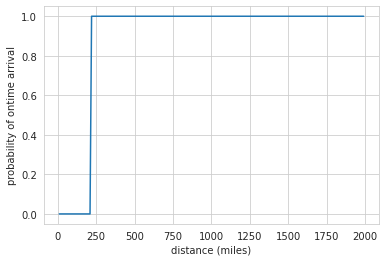

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
dist = np.arange(10, 2000, 10)
prob = [lrmodel.predict([20, 10, d]) for d in dist]
sns.set_style("whitegrid")
ax = plt.plot(dist, prob)
plt.xlabel('distance (miles)')
plt.ylabel('probability of ontime arrival')

Text(0, 0.5, 'probability of ontime arrival')

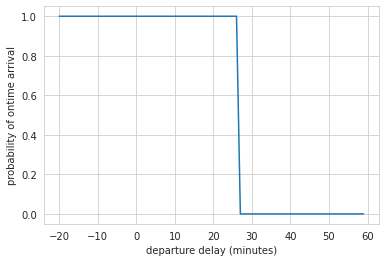

In [128]:
delay = np.arange(-20, 60, 1)
prob = [lrmodel.predict([d, 10, 500]) for d in delay]
ax = plt.plot(delay, prob)
plt.xlabel('departure delay (minutes)')
plt.ylabel('probability of ontime arrival')


In [129]:
def eval(labelpred):
    ''' 
        data = (label, pred)
            data[0] = label
            data[1] = pred
    '''
    cancel = labelpred.filter(lambda data: data[1] < 0.7)
    nocancel = labelpred.filter(lambda data: data[1] >= 0.7)
    corr_cancel = cancel.filter(lambda data: data[0] == int(data[1] >= 0.7)).count()
    corr_nocancel = nocancel.filter(lambda data: data[0] == int(data[1] >= 0.7)).count()
    
    cancel_denom = cancel.count()
    nocancel_denom = nocancel.count()
    if cancel_denom == 0:
        cancel_denom = 1
    if nocancel_denom == 0:
        nocancel_denom = 1
    return {'total_cancel': cancel.count(), \
            'correct_cancel': float(corr_cancel)/cancel_denom, \
            'total_noncancel': nocancel.count(), \
            'correct_noncancel': float(corr_nocancel)/nocancel_denom \
           }


In [132]:
lrmodel.clearThreshold() # so it returns probabilities
labelpred = examples.map(lambda p: (p.label, lrmodel.predict(p.features)))

print('All flights:')
print(labelpred.collect())
print(eval(labelpred))

# keep only those examples near the decision threshold
print('Flights near decision threshold:')
labelpred = labelpred.filter(lambda data: data[1] > 0.65 and data[1] < 0.75)
print(eval(labelpred))

All flights:
[(1.0, 1.0), (1.0, 1.0), (1.0, 0.9999999926025283), (1.0, 1.0), (1.0, 1.0), (0.0, 1.4019528052397697e-07), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.9999999567755128), (1.0, 0.999999999955558), (1.0, 1.0), (0.0, 4.482512815673165e-11), (1.0, 0.9999999999999998), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.9999998621833203), (1.0, 0.9999999999999976), (1.0, 0.9999999999999314), (1.0, 0.999999948832452), (1.0, 1.0), (1.0, 1.0)]
{'total_cancel': 2, 'correct_cancel': 1.0, 'total_noncancel': 28, 'correct_noncancel': 1.0}
Flights near decision threshold:
{'total_cancel': 0, 'correct_cancel': 0.0, 'total_noncancel': 0, 'correct_noncancel': 0.0}


In [135]:
distthresh = sparkFlightDF.approxQuantile('distance', list(np.arange(0, 1.0, 0.2)), 0.02)
distthresh[-1] = float('inf')
distthresh

[89.0, 328.0, 486.0, 628.0, inf]

In [137]:
delaythresh = sparkFlightDF.approxQuantile('dep_delay', list(np.arange(0, 1.0, 0.2)), 0.05)
delaythresh[-1] = float('inf')
delaythresh

[-12.0, -8.0, -4.0, -1.0, inf]

In [140]:
from pyspark.sql.functions import *
sparkFlightDF=sparkFlightDF.withColumn("ontime",when(col("ARR_DELAY")<0,"True").when(col("DEP_DELAY")>0,"True").otherwise("false") )
sparkFlightDF.show()

+----------+--------------+---------------------+------+-------------------+----+------------+-------------------+---------+--------+----------+---------+-------+------------+-------------------+---------+---------+--------+--------+------+
|   FL_DATE|UNIQUE_CARRIER|ORIGIN_AIRPORT_SEQ_ID|ORIGIN|DEST_AIRPORT_SEQ_ID|DEST|CRS_DEP_TIME|           DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|           ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|DISTANCE|ontime|
+----------+--------------+---------------------+------+-------------------+----+------------+-------------------+---------+--------+----------+---------+-------+------------+-------------------+---------+---------+--------+--------+------+
|2015-04-28|            EV|              1000101|   ABE|            1000101| ATL|        1600|1970-01-01 00:25:55|     -5.0|     7.0|      1602|     1747|    4.0|        1809|1970-01-01 00:29:11|    -18.0|    false|   false|     692|  True|
|2015-11-05|            DL|         

In [147]:
import pyspark.sql.functions as F
import pandas as pd

delaythresh = range(10, 20)
df = pd.DataFrame(columns=['dist_thresh', 'delay_thresh', 'frac_ontime'])
for m in range(0, 2): # len(distthresh)-1):
    for n in range(0, len(delaythresh)-1):
        bdf = sparkFlightDF[(sparkFlightDF['distance'] >= distthresh[m])
             & (sparkFlightDF['distance'] < distthresh[m+1])
             & (sparkFlightDF['dep_delay'] >= delaythresh[n])
             & (sparkFlightDF['dep_delay'] < delaythresh[n+1])]
        ontime_frac =1
        print (m, n, ontime_frac)
        df = df.append({
            'dist_thresh': distthresh[m], 
            'delay_thresh': delaythresh[n],
            'frac_ontime': ontime_frac
        }, ignore_index=True)
df       


0 0 1
0 1 1
0 2 1
0 3 1
0 4 1
0 5 1
0 6 1
0 7 1
0 8 1
1 0 1
1 1 1
1 2 1
1 3 1
1 4 1
1 5 1
1 6 1
1 7 1
1 8 1


,dist_thresh,delay_thresh,frac_ontime
0,89.0,10.0,1.0
1,89.0,11.0,1.0
2,89.0,12.0,1.0
3,89.0,13.0,1.0
4,89.0,14.0,1.0
5,89.0,15.0,1.0
6,89.0,16.0,1.0
7,89.0,17.0,1.0
8,89.0,18.0,1.0
9,328.0,10.0,1.0


In [148]:
df['score'] = abs(df['frac_ontime'] - 0.7)
bayes = df.sort_values(['score']).groupby('dist_thresh').head(1).sort_values('dist_thresh')
bayes

TypeError: ignored